# Milestone 1 - Data Visualization Complementary Views 

## Author - Kenji Oman



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

### Workplace Scenario
A certain casino has contracted your team to determine if there are any patterns among their tables and patron attendance. They are not asking for prediction, just for a description of what is already there.

### Data Dictionary
* GameCode: 2 digit game code. 
  - BA: Baccarat
  - C4: Blackjack variant
  - CR: Craps
  - DH: Blackjack variant
  - FP: Four Card Poker
  - LI: Let it Ride
  - MI: Omaha Hi-Low
  - MQ:  Blackjack variant
  - MR: Mini-Baccarat
  - MS: Mississippi Stud
  - ND: Blackjack variant
  - PA: Pai Gow Tiles
  - PG: Pai Gow
  - RO: Roulette
  - RR: Electronic Roulette
  - S6: Big Six
  - SH: Blackjack variant
  - TH: Blackjack variant
  - TL: Blackjack variant
  - TP: Texas Hold'em Poker
  - UT: Ultimate Texas Hold'em
  - WR: Casino War
* DateFormat: Date
* Hour: 0-23 of the day
* TabelsOcc:  Number of Tables Occupied in the casino
* TablesOpen: Number of tables open in the casino. This number can be different than occupied because the pit boss can open a table and no one can be sitting at it.
* Tables Closed: Number of tables closed in the casino.
* HeadCount: Total Count of people at the hour, day, and table type
* DayOfWeek: 1-7.  1 = Sunday, 7 = Saturday.
* DayNumber 1-366:  Day of year.  Not really needed, but note that the dates start in September.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
# Parse the "DateFormat" column as a date, instead of as a string
headcount_df = pd.read_csv(filename, parse_dates=['DateFormat'])

## Peak at the data/ explore total tables

In [3]:
# Peak at the data
display(headcount_df.head())
headcount_df.describe(include='all')

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,2011-09-16,6,0,0,1,0,6,47
1,BA,2011-09-16,7,0,0,1,0,6,47
2,BA,2011-09-16,8,0,0,1,0,6,47
3,BA,2011-09-16,9,0,0,1,0,6,47
4,BA,2011-09-16,10,0,1,0,0,6,47


,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677,175677,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
unique,22,366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,MR,2011-09-19 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8778,504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-08-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,NaN,NaN,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,NaN,NaN,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000


From the above, we notice that there are a **maximum of 24 tables** in this casino (both occupied and open table counts maxes out at 24, while closed tables maxes at 23 -- you need at least one table to be open for the casino to be open).

In [4]:
# Check to make sure we know the data-types of the columns
headcount_df.dtypes

GameCode                object
DateFormat      datetime64[ns]
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek                int64
DayNumber                int64
dtype: object

In [5]:
# We want to add the Hour column to the Date column, so it's a combined date/time column (since these both carry information about time.)
# and, set the datetime format
headcount_df['DateFormat'] = pd.to_datetime(headcount_df.DateFormat + pd.to_timedelta(headcount_df.Hour, 'h'), format='%Y-%m-%d %H')
display(headcount_df.DateFormat.head())

#Also, set this as the index
headcount_df.set_index('DateFormat', inplace=True)

# Now, we don't need the hour column, so lets drop it
headcount_df.drop(columns='Hour', inplace=True)

0   2011-09-16 06:00:00
1   2011-09-16 07:00:00
2   2011-09-16 08:00:00
3   2011-09-16 09:00:00
4   2011-09-16 10:00:00
Name: DateFormat, dtype: datetime64[ns]

In [6]:
# Now, make sure tables open + closed = 24 (the max table count)
((headcount_df.TablesOpen + headcount_df.TablesClosed) == 24).all()

False

_**This is suprising**_ -- let's look more into this sum (the total number of open and closed tables, which we would have thought is the maximum number of tables in this casino)

In [7]:
# Look at summary statistics of what we think should be the total # of tables
(headcount_df.TablesOpen + headcount_df.TablesClosed).describe()

count    175677.000000
mean          4.409234
std           5.018419
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max          24.000000
dtype: float64

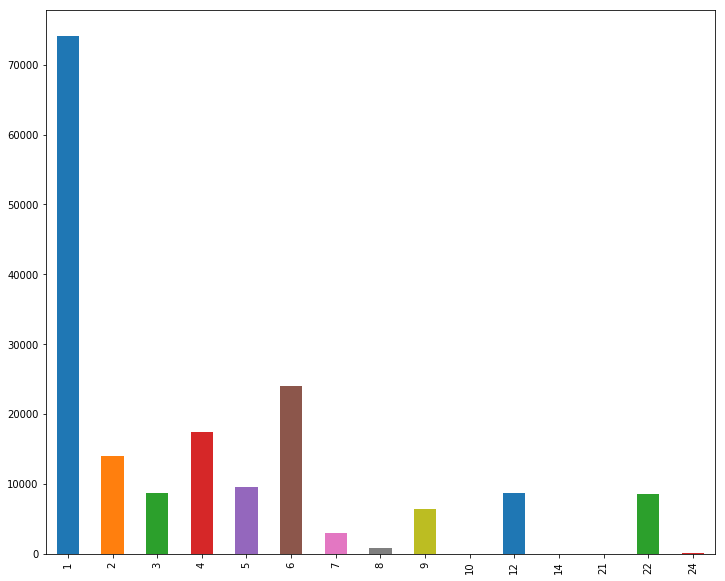

In [8]:
# Let's see the distribution of this, and how this changes over time, as a barchart
# (since hist bins can break at non-integer tables, which don't make sense)
f = plt.figure(figsize=(12,10))
ax1 = f.add_subplot(111)
(headcount_df.TablesOpen + headcount_df.TablesClosed).value_counts(sort=False).plot.bar(ax=ax1)
plt.show()

Hmm, this is weird -- how can the total number of tables be changing so much ... (in fact, it is quite rare for the total number of tables to equal 24).  Let's look at how these vary by time.

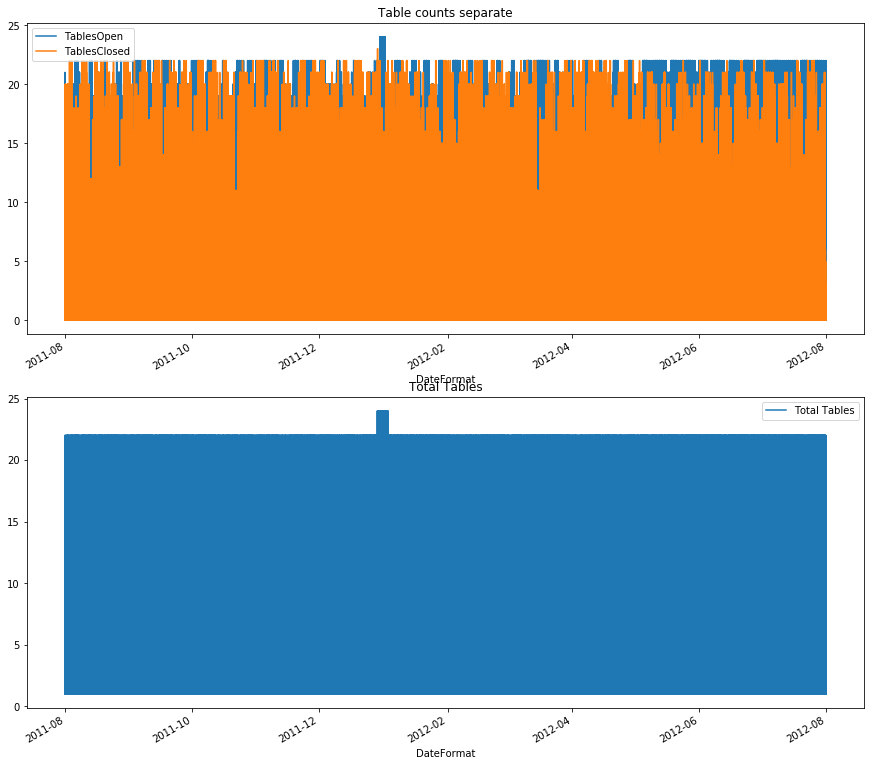

In [9]:
# Timeseries of tables
# Sort by date first
headcount_df = headcount_df.sort_index()
f = plt.figure(figsize=(15,14))
ax = f.add_subplot(211)
headcount_df.TablesOpen.plot(ax = ax)
headcount_df.TablesClosed.plot(ax = ax)
ax.set_title('Table counts separate')
ax.legend()
ax = f.add_subplot(212)
(headcount_df.TablesOpen + headcount_df.TablesClosed).plot(ax = ax, label='Total Tables', title='Total Tables')
ax.legend()
plt.show()

These fluctuate by time quite a bit, but we can see in the total tables plot that there was only 24 tables during a short period, right around January 2012.  Let's look at tables open vs closed directly.

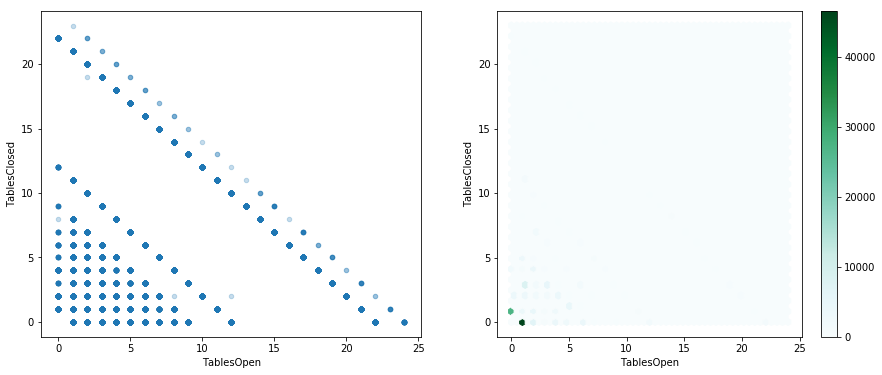

In [10]:
# Look at open/ closed tables together as a scatterplot, and as hexbin
f = plt.figure(figsize=(15,6))
ax = f.add_subplot(121)
headcount_df.plot.scatter(x='TablesOpen', y='TablesClosed', ax=ax, alpha=0.25)
ax = f.add_subplot(122)
headcount_df.plot.hexbin(x='TablesOpen', y='TablesClosed', ax=ax, gridsize=50)
plt.show()

So, it looks like our assumption that TablesOpen + TablesClosed should equal the total tables is somehow not right -- or, we really don't understand what is going on with this casino.  For the **_vast_** majority of times recorded, there is either one table open, with none closed, or one table closed, with none open.  So, if tables open + tables closed equaled the total number of tables in this casino, this would imply that for the vast majority of the times recorded, this casino has lent out all their tables to someone/ somewhere else, so they only have one table in the casino at all.  Who does that?? :P  However, if we recall again the "histogram" (actually used a bar chart) of the "total tables", and the timeseries line plot:

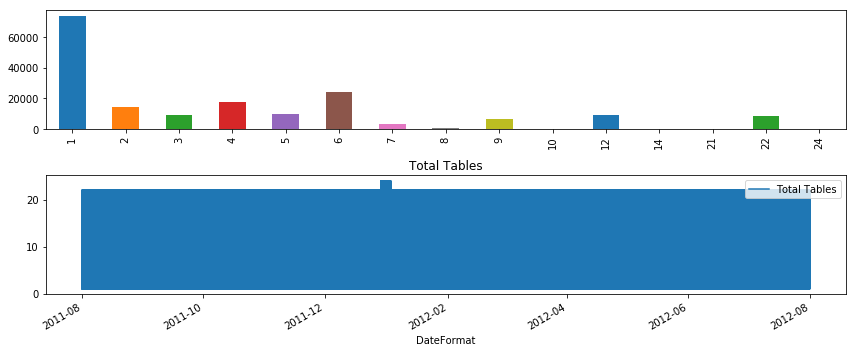

In [11]:
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(211)
(headcount_df.TablesOpen + headcount_df.TablesClosed).value_counts(sort=False).plot.bar(ax=ax)
ax = f.add_subplot(212)
(headcount_df.TablesOpen + headcount_df.TablesClosed).plot(ax = ax, label='Total Tables', title='Total Tables')
ax.legend()
plt.tight_layout()
plt.show()

We see that there is a wide variety of other table counts, and the "total tables" does go up to 22 regularly enough that the timeseries seems to be a block with a height at this value.  Let's see if we can break this out by day of the week or hour of the day, to see if we can notice any other patterns there.

In [12]:
# First, since we keep referring to this, let's add a column called total tables
headcount_df['TotalTables'] = (headcount_df.TablesOpen + headcount_df.TablesClosed)

# Now, group by total tables to find total tables by day of week. (since we can't call weekday on the index of
# a groupby, let's make a temp table with it first)
weekday = headcount_df['TotalTables'].to_frame()
weekday['weekday'] = weekday.index.weekday_name
temp = weekday.groupby('TotalTables').weekday.value_counts().unstack().fillna(0).astype(int)
temp = temp['Sunday Monday Tuesday Wednesday Thursday Friday Saturday'.split()]
temp

weekday,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
TotalTables,,,,,,,
1,10469,10677,10757,10580,10567,10509,10488
2,2039,2061,2011,1898,1913,2006,2040
3,1246,1269,1272,1247,1248,1248,1248
4,2467,2514,2520,2490,2496,2478,2472
5,1367,1389,1392,1347,1328,1355,1368
6,3401,3471,3480,3449,3456,3421,3408
7,432,432,432,384,416,432,432
8,145,144,91,71,89,131,144
9,885,909,965,984,951,901,888


Nothing particularly enlightening, other than there are a few table counts that never happen (11, 13, 15-20, 23), and a few that only happen on once (10, 14, 21).  Let's try looking by hour to see if this clears anything up.

In [13]:
weekday['hour'] = weekday.index.hour
temp = weekday.groupby('TotalTables').hour.value_counts().unstack().fillna(0).astype(int)
with pd.option_context('max_columns', 0):
    display(temp)

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
TotalTables,,,,,,,,,,,,,,,,,,,,,,,,
1,3089,3088,3071,3089,3088,3088,3071,3079,3079,3087,3087,3087,3087,3087,3087,3087,3087,3087,3087,3087,3087,3087,3087,3087
2,581,582,579,581,580,580,579,580,581,583,583,583,583,583,583,583,583,583,583,583,583,583,583,583
3,366,366,364,366,366,366,364,365,365,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366
4,727,726,723,727,728,728,723,725,725,727,727,727,727,727,727,727,727,727,727,727,727,727,727,727
5,398,399,396,398,397,397,396,398,397,398,398,398,398,398,398,398,398,398,398,398,398,398,398,398
6,1005,1004,999,1005,1006,1006,999,1001,1001,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
7,122,122,122,122,122,122,122,122,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124,124
8,34,35,34,34,34,34,34,33,33,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
9,271,270,269,271,271,271,269,271,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270,270


In [14]:
# And, if we combine weekday and hour
temp = weekday.groupby('TotalTables weekday'.split()).hour.value_counts().unstack().fillna(0).astype(int)
with pd.option_context('max_columns', 0, 'display.max_rows', 1000):
    display(temp)

hour                    0    1    2    3    4    5    6    7    8    9    10 ...    13   14   15   16   17   18   19   20   21   22   23
TotalTables weekday                                                          ...                                                        
1           Friday     440  440  440  440  440  440  440  437  437  437  437 ...   437  437  437  437  437  437  437  437  437  437  437
            Monday     446  446  446  446  446  446  437  437  437  446  446 ...   446  446  446  446  446  446  446  446  446  446  446
            Saturday   437  437  437  437  437  437  437  437  437  437  437 ...   437  437  437  437  437  437  437  437  437  437  437
            Sunday     437  436  419  437  437  437  437  437  437  437  437 ...   437  437  437  437  437  437  437  437  437  437  437
            Thursday   441  441  441  441  441  441  441  440  440  440  440 ...   440  440  440  440  440  440  440  440  440  440  440
            Tuesday    446  446  446  446  446  446  448  449  449  449  449 ...   449  449  449  449  449  449  449  449  449  449  449
            Wednesday  442  442  442  442  441  441  431  442  442  441  441 ...   441  441  441  441  441  441  441  441  441  441  441
2           Friday      80   80   80   80   80   80   82   84   85   85   85 ...    85   85   85   85   85   85   85   85   85   85   85
            Monday      86   86   86   86   86   86   85   85   85   86   86 ...    86   86   86   86   86   86   86   86   86   86   86
            Saturday    85   85   85   85   85   85   85   85   85   85   85 ...    85   85   85   85   85   85   85   85   85   85   85
            Sunday      85   86   83   85   85   85   85   85   85   85   85 ...    85   85   85   85   85   85   85   85   85   85   85
            Thursday    79   79   79   79   79   79   79   80   80   80   80 ...    80   80   80   80   80   80   80   80   80   80   80
            Tuesday     86   86   86   86   86   86   84   83   83   83   83 ...    83   83   83   83   83   83   83   83   83   83   83
            Wednesday   80   80   80   80   79   79   79   78   78   79   79 ...    79   79   79   79   79   79   79   79   79   79   79
3           Friday      52   52   52   52   52   52   52   52   52   52   52 ...    52   52   52   52   52   52   52   52   52   52   52
            Monday      53   53   53   53   53   53   52   52   52   53   53 ...    53   53   53   53   53   53   53   53   53   53   53
            Saturday    52   52   52   52   52   52   52   52   52   52   52 ...    52   52   52   52   52   52   52   52   52   52   52
            Sunday      52   52   50   52   52   52   52   52   52   52   52 ...    52   52   52   52   52   52   52   52   52   52   52
            Thursday    52   52   52   52   52   52   52   52   52   52   52 ...    52   52   52   52   52   52   52   52   52   52   52
            Tuesday     53   53   53   53   53   53   53   53   53   53   53 ...    53   53   53   53   53   53   53   53   53   53   53
            Wednesday   52   52   52   52   52   52   51   52   52   52   52 ...    52   52   52   52   52   52   52   52   52   52   52
4           Friday     104  104  104  104  104  104  103  103  103  103  103 ...   103  103  103  103  103  103  103  103  103  103  103
            Monday     105  105  105  105  105  105  103  103  103  105  105 ...   105  105  105  105  105  105  105  105  105  105  105
            Saturday   103  103  103  103  103  103  103  103  103  103  103 ...   103  103  103  103  103  103  103  103  103  103  103
            Sunday     103  102   99  103  103  103  103  103  103  103  103 ...   103  103  103  103  103  103  103  103  103  103  103
            Thursday   104  104  104  104  104  104  104  104  104  104  104 ...   104  104  104  104  104  104  104  104  104  104  104
            Tuesday    105  105  105  105  105  105  105  105  105  105  105 ...   105  105  105  105  105  105  105  105  105  105  105
            Wednesday  103 

With all the above, I think **we can't really conclude anything about total table counts (Tables Open + Tables Closed)**.  It seems that the number of occurances for a given table count is fairly uniform across hours of the day for the different weekdays, with the biggest changes in the number of instances occuring from total table count to total table count.  So instead, let's just look at the other columns and see how they relate to the number of open tables and the number of occupied tables.

--------

Actually, I think I may have figured it out.  If we look at how many total tables there are across the different game types for a given day/ hour:

In [15]:
# Count the sum of tables across game types per date/hour
headcount_df.groupby([headcount_df.index]).TotalTables.sum().value_counts()

88    6410
89    2128
90     120
86     119
95       1
Name: TotalTables, dtype: int64

We see a lot fewer options -- most day/times, we have 88 total tables, with a few other times with 89, 90, 86, and 95 total tables.  What is being played likely fluctuates depending on time of day, so we should look at the fraction of total tables on each game, etc.

In [16]:
# First, let's rename TotalTables to TotalGameTables (total tables ready to go of a given game type)
headcount_df.rename(columns={'TotalTables': 'TotalGameTables'}, inplace=True)

# Now, let's get the total tables available in the store as a new TotalTables column
headcount_df['TotalTables'] = headcount_df.groupby([headcount_df.index]).TotalGameTables.sum()

# Also, let's replace DayOfWeek number with the actual name of the weekday
headcount_df['DayOfWeek'] = headcount_df.index.weekday_name
headcount_df.head()

,GameCode,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber,TotalGameTables,TotalTables
DateFormat,,,,,,,,,
2011-08-01,C4,1,1,0,2,Monday,1,1,88
2011-08-01,TH,2,2,0,8,Monday,1,2,88
2011-08-01,PA,1,1,0,3,Monday,1,1,88
2011-08-01,RO,6,6,0,22,Monday,1,6,88
2011-08-01,TL,0,1,0,0,Monday,1,1,88


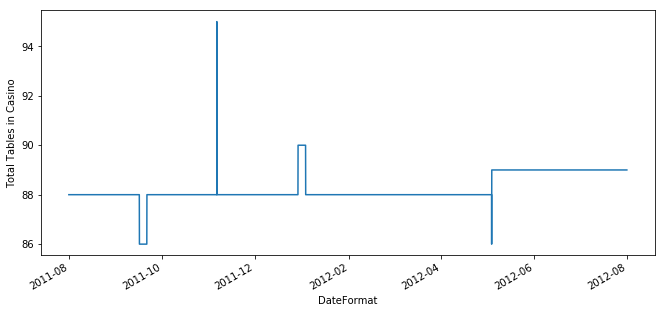

In [17]:
# Now, to confirm, let's try plotting this new total tables with respect to the date/time
headcount_df.TotalTables.plot(figsize=(11,5))
plt.ylabel('Total Tables in Casino')
plt.show()

Much better!  So, to _**summarize our findings so far:**_
* TablesOcc = the total number of tables of a given game type, at a given day/hour, that have people at them
* TablesOpen = the total number of tables of a given game type, at a given day/hour, that are open/ available for people to play at.
* TablesClosed = the total number of tables of a given game type, at a given day/hour, that are set up for playing the specified game type, but are currently not open.

## Total Tables of Given type, vs time
Now, let's take a look to see if there is a difference in the total number of game tables of a given type over time (did they change how they distributed the number of game tables available as the months went on?)

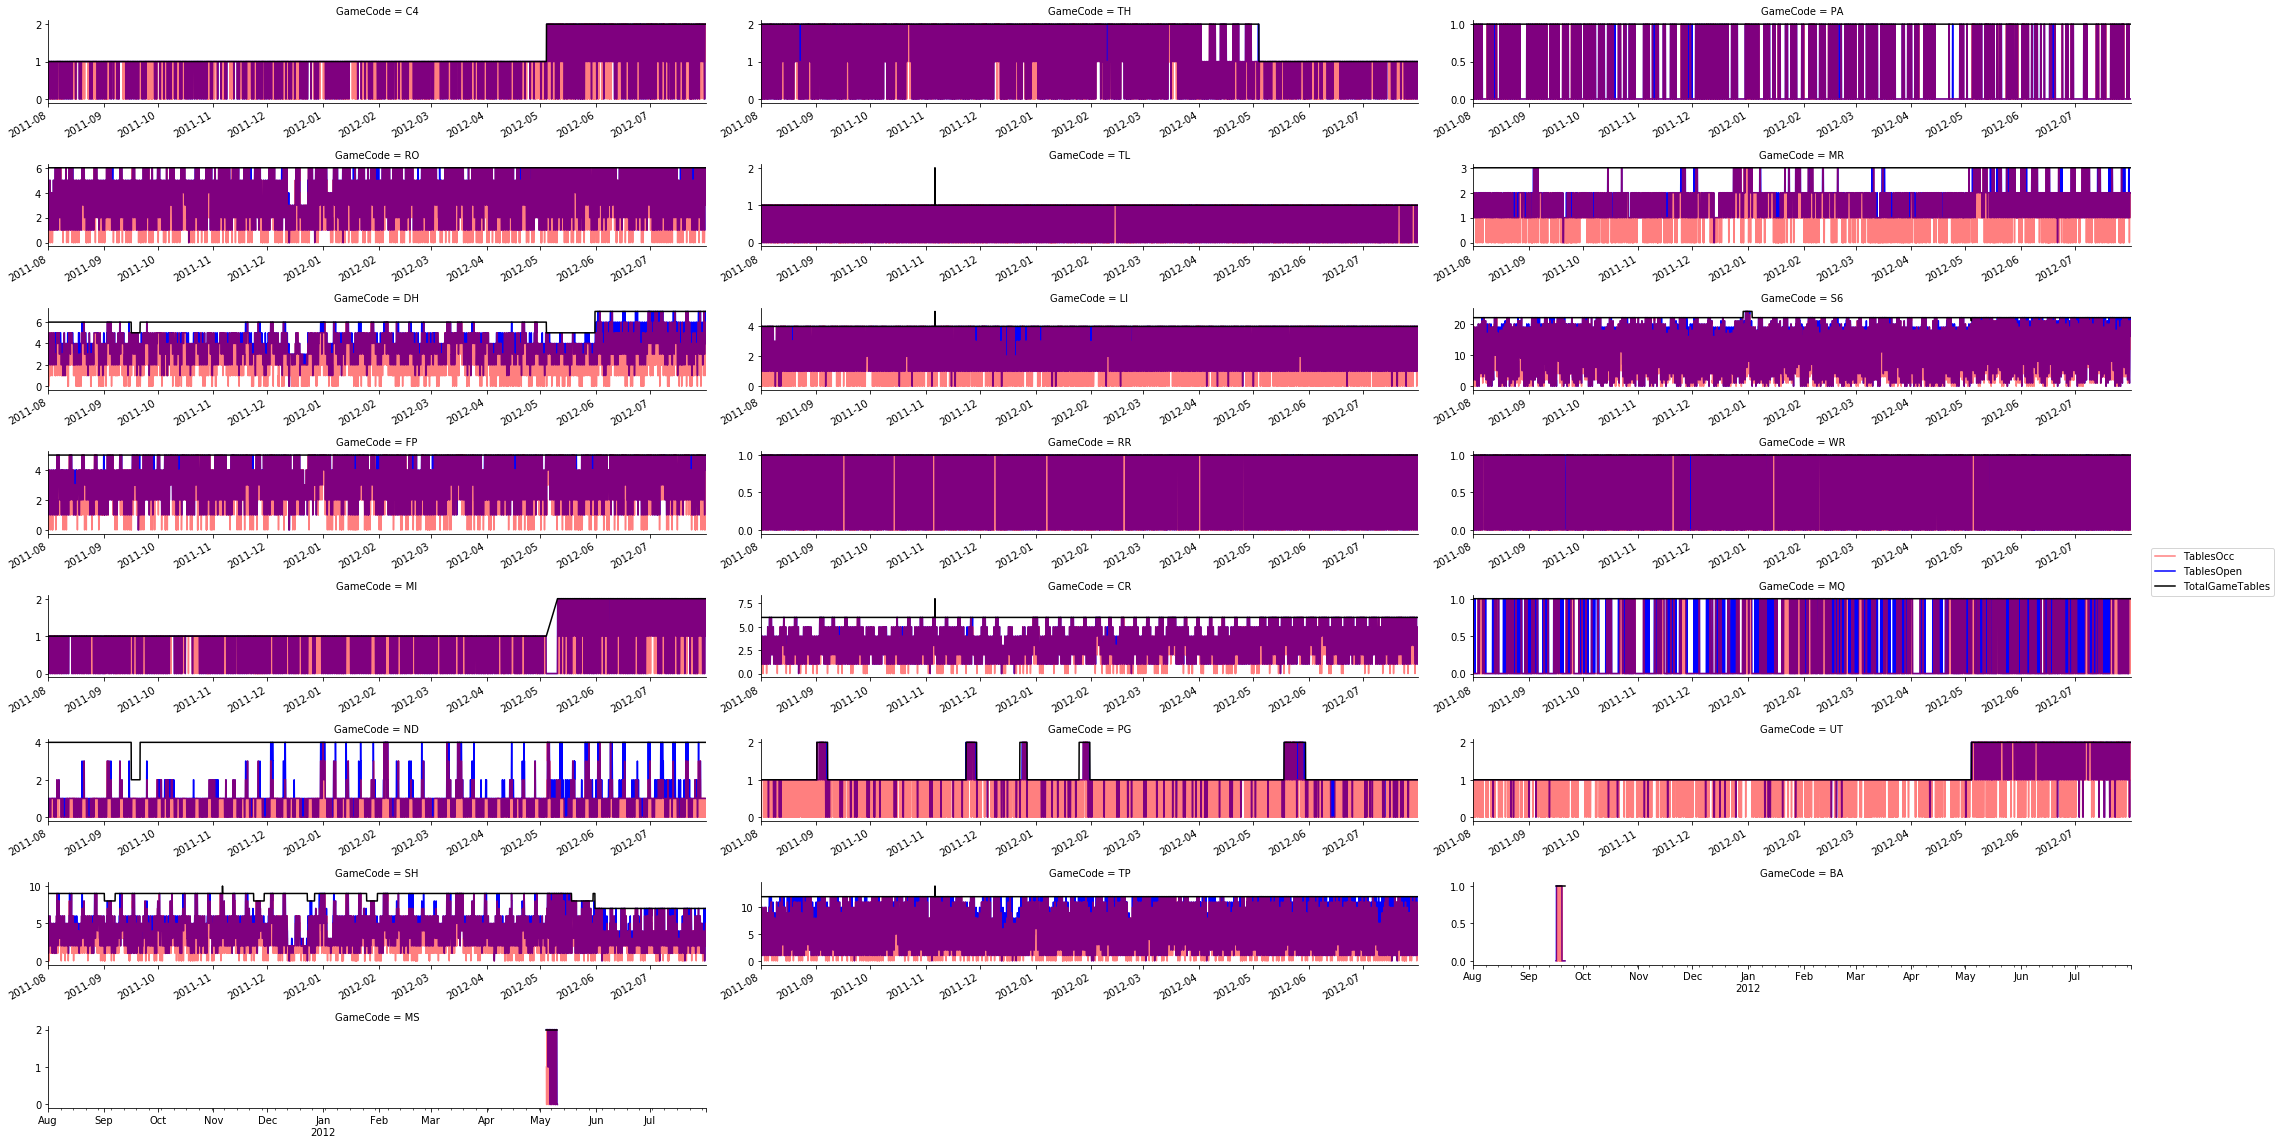

In [18]:
# Having problems with plotting on facetgrid, or just sns.tsplot, so let's create my own function
def ts_func(x, y, **kwargs):
    #print(x, y, kwargs['data'].head(), sep='\n')
    ax = plt.gca()
    data = kwargs.pop('data')
    data.plot(x, y, ax=ax, **kwargs)
    
def head_cnt_fnc(x, y, **kwargs):
    ax = plt.gca()
    ax = ax.twinx()
    data = kwargs.pop('data')
    data.plot(x, y, ax=ax, **kwargs)

g = sns.FacetGrid(headcount_df.reset_index(), col='GameCode', col_wrap=3, sharex=False, sharey=False, size=2, aspect=5)
g = g.map_dataframe(ts_func, x='DateFormat', y='TablesOpen', color='blue', title='Open Tables')
g = g.map_dataframe(ts_func, x='DateFormat', y='TablesOcc', color='red', title='Occupied Tables', alpha=0.5)
#g = g.map_dataframe(head_cnt_fnc, x='DateFormat', y='HeadCount', color='lime', title='HeadCount', alpha=0.5)
g = g.map_dataframe(ts_func, x='DateFormat', y='TotalGameTables', color='black', title='Total Tables of Type')
g.set(xlim=(headcount_df.index.min(), headcount_df.index.max()))
g.fig.tight_layout()
g = g.add_legend()
plt.show()

Wow, this figure has quite a bit of information! (I originally tried to include headcounts too (instead of Occupied tables -- can still do it if you uncomment the one line), but then it was just too much information, so I dropped that idea).  A few observations:

* "BA" and "MS" were tried for a week or so each, but were then discontinued for whatever reason.  "BA" even had a table dedicated to it for about half a week, but remained closed during this period (at the end of its lifetime)
* "C4", "TH", and "UT" all had 2 or 1 tables, where "C4" and "UT" went from 1 to 2 table around May of 2012, while "TH" dropped from 2 to 1 tables at the same time.
* Speaking of May 2012, it seems there was some re-structuring happening during this time, as there are also changes in the total number of tables set up for "DH", "MI", and "SH".  Interestingly, "DH" initially lost a table, but then went up by two one month later -- it must have been popular, and management realized their mistake :P
* There was a day (or so?) in November of 2011 when there must have been a party or something, as there are a few extra tables open for the tables "TL", "LI", "CR", "SH",  and "TP", with all other games having the same number of total tables.

Let's try to look at the how populated these tables are.

## Headcount per table per game type

In [19]:
# Find how many people are at each table, per time of day
people_by_day = headcount_df.groupby(['DayOfWeek', 'GameCode']).HeadCount.sum().rename('total_people').reset_index()

# We need to normalize by how many hours each game was offered per weekday
hours_by_day = headcount_df.groupby(['DayOfWeek', 'GameCode']).HeadCount.count().rename('hours_offered').reset_index()

# Now, merge the two
by_day_of_week = pd.merge(people_by_day, hours_by_day, on=['DayOfWeek', 'GameCode'], how='outer')

# Now, normalize total people by hours to get rate of people playing each game per hour
by_day_of_week['people_per_hour'] = by_day_of_week.total_people / by_day_of_week.hours_offered
by_day_of_week.head()

,DayOfWeek,GameCode,total_people,hours_offered,people_per_hour
0,Friday,BA,1,18,0.055556
1,Friday,C4,3688,1248,2.955128
2,Friday,CR,31497,1248,25.237981
3,Friday,DH,9252,1248,7.413462
4,Friday,FP,14166,1248,11.350962


In [20]:
# Now, let's make a plot of this. First, sort by week day and people per hour
by_day_of_week.sort_values(['DayOfWeek', 'people_per_hour'], ascending=False, inplace=True)

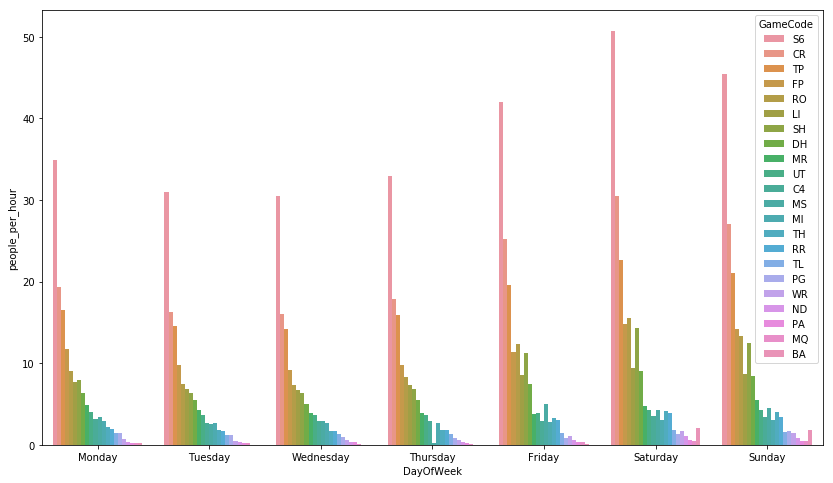

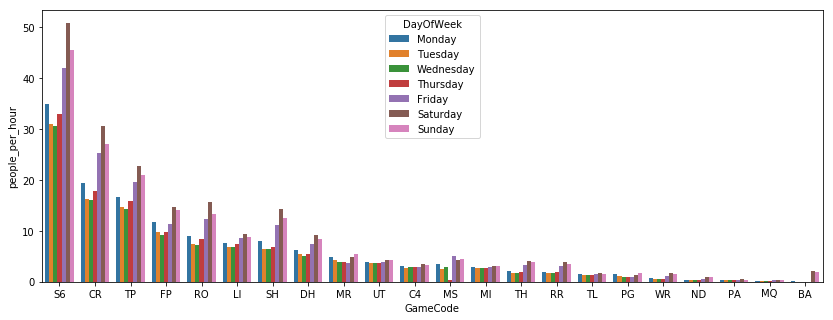

In [21]:
# Set Week day order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Now, make plots
f = plt.figure(figsize=(14,8))
ax = f.add_subplot(111)
sns.barplot(x='DayOfWeek', y='people_per_hour', hue='GameCode', order=weekday_order, data=by_day_of_week, ax=ax)
plt.show()

# Also, by Game code first
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(111)
sns.barplot(x='GameCode', y='people_per_hour', hue='DayOfWeek', hue_order=weekday_order, data=by_day_of_week, ax=ax)
plt.show()

From the above, it is very obvious the rankings of how popular the different games are -- S6 is much more popular than any other game, with the weekends being a lot more popular than weekdays.  Some interesting deviations:

* "BA" is **vastly** more popular on Saturday and Sunday, while it is hardly played during the remaining week days.  So, it could be replaced to another table on other weekdays, and only have it set up for Saturday and Sunday
* Similarly, for some reason, "MS" is fairly popular for most days, except for Thursdays.  Don't know what is special about Thrusdays, but this game could be replaced with something else on these days, since no one seems to want to play this game then.

One more thing to examine: The number of people that can play a game is largely dependent on how many tables are set up of that game-type.  Let's try normalizing by the number of open tables, and see how these plots may change.

## Headcount per table per game type, per how many tables of that game type are open

In [22]:
# Grab the number of tables set up per week day and game type
tables_open = headcount_df.groupby(['DayOfWeek', 'GameCode']).TablesOpen.sum().rename('tables_open').reset_index()

# And add this column to the by_day_of_week df
by_day_of_week = pd.merge(by_day_of_week, tables_open, on=['DayOfWeek', 'GameCode'], how='outer')

# Now, make a new metric where we normalize by tables open as well
by_day_of_week['people_per_table_per_hour'] = by_day_of_week.people_per_hour / by_day_of_week.tables_open

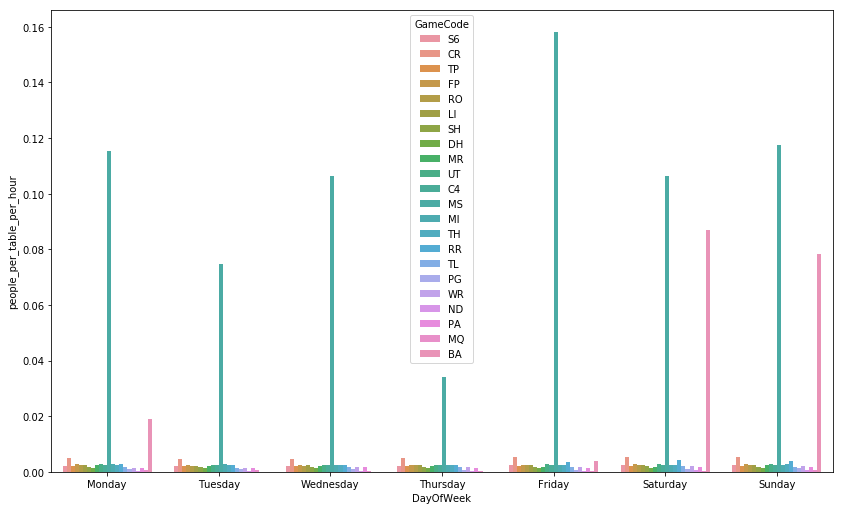

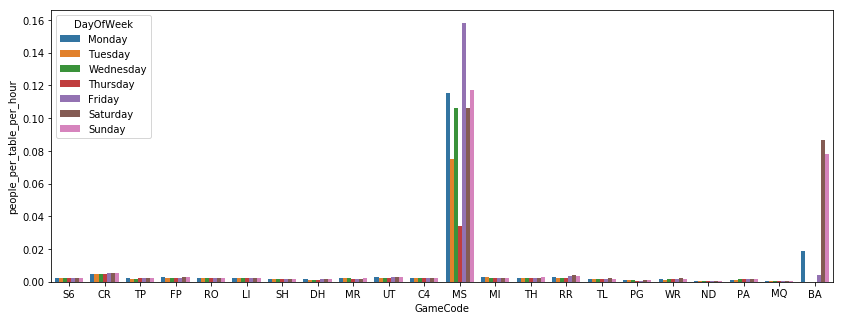

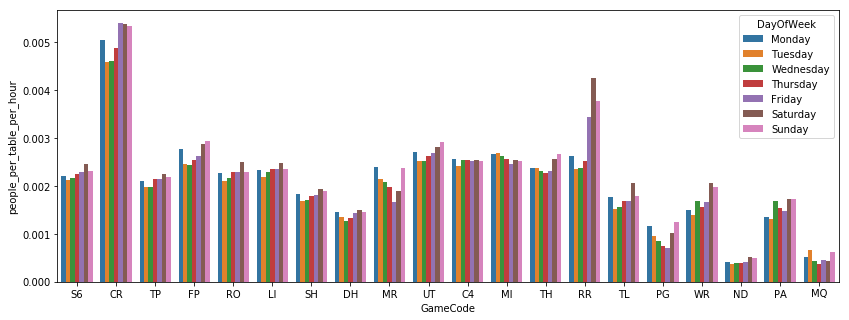

In [23]:
# Now, make the same plots on these numbers
f = plt.figure(figsize=(14,8.5))
ax = f.add_subplot(111)
sns.barplot(x='DayOfWeek', y='people_per_table_per_hour', hue='GameCode', order=weekday_order, data=by_day_of_week, ax=ax)
plt.show()

# Also, by Game code first
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(111)
sns.barplot(x='GameCode', y='people_per_table_per_hour', hue='DayOfWeek', hue_order=weekday_order, data=by_day_of_week, ax=ax)
plt.show()

# Let's re-make the plot by game code, removing the most popular games, since otherwise we can't see the rest of the data well
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(111)
sns.barplot(x='GameCode', y='people_per_table_per_hour', hue='DayOfWeek', hue_order=weekday_order,
            data=by_day_of_week[~by_day_of_week.GameCode.isin(['MS', 'BA'])], ax=ax)
plt.show()

Wow, what a different story!  Although "S6" had the most people visit per hour, it is no where near as popular per table offered.  In comparison, "MS" and "BA" are always more packed per table (although we still see Saturday and Sunday are the best days for "BA", and Thursdays are strangely less occupied for "MS").  Looking back to the timeseries of number of tables per game, though, we see that these two games are the ones that were only tried for a short period of time.  For whatever reason (even though the games seemed to be quite popular), management decided to cut these tables.

# Summary
* The weekend (Friday, Saturday, and Sunday) tends to have the greatest number of people coming to the casino.
* "S6" has the most number of people visit each hour, on average.
* When we normalize by the number of tables open, however, "MS", and "BA" have a lot higher table densities per hour.  This could be just because these games were only offered for a limited time, and so that "exclusivity" drew more people to try them out.  However, considering how many people tried these games, I would have thought management should keep them for longer to see if they continue to be popular.  But, we recognize that perhaps there is additional information we don't have access to (player surveys, for example) that indicated to management that it wasn't worth it to keep these games for any longer.

# Future Directions
If I had more time, I could examine the data more to see what further patterns we can extract from it:
* See if the number of people per table per game varies as the number of open tables changes (a scatter plot of people per table per hour vs # of open tables per hour)
* See if there are more or less popular times of the day, by weekday (perhaps do the above barcharts, faceted by weekday, and having the x-axis be the time of the day)
* Look more into the "party" that was happening in November 2011 (what games were being offered, how the distribution may have changed from the baseline casino operations, etc).
* Examine what perhaps went on with "C4", "TH", "UT" transitioning in the total number of tables offered around May 2012 -- did the headcounts per hour change before and after this transition?  How about headcounts per table per hour?
* Things would be really interesting if we had revenue per hour (but sadly, we don't have that ...).